In [1]:
import pandas as pd
pd.set_option('max_columns', None)

import numpy as np
%matplotlib inline

In [2]:
wargame = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/wargame-data/master/data/510064564/final_data.csv", index_col=0)

/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,12,27,42,43,48,63,77,78,90,110,113,117,118,130,150,153,283,284,298,318,321,325,326,340,360,363,367,368,382,402,405,409,410,422,442,445,449,450,464,484,487,491,492,504,524,527) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
wargame = wargame.drop(['Salves', 'SalvoIsMainSalvo'], axis='columns')

We'll cut down in the size of the `DataFrame` we're working with by throwing out weapon data for weapons with indices over three (which are really only present on ships anyway).

In [4]:
wargame = wargame.iloc[:, 
    wargame.columns.map(lambda c: True if 'Weapon' not in c else True if not any(map(lambda n: str(n) in c, range(4, 13))) else False)
]

In [7]:
len(wargame.columns)

279

In [8]:
import missingno as msno

In [5]:
weapons = wargame.loc[:, wargame.columns.map(lambda c: 'Weapon' in c)]
attributes = wargame.loc[:, wargame.columns.map(lambda c: 'Weapon' not in c)]

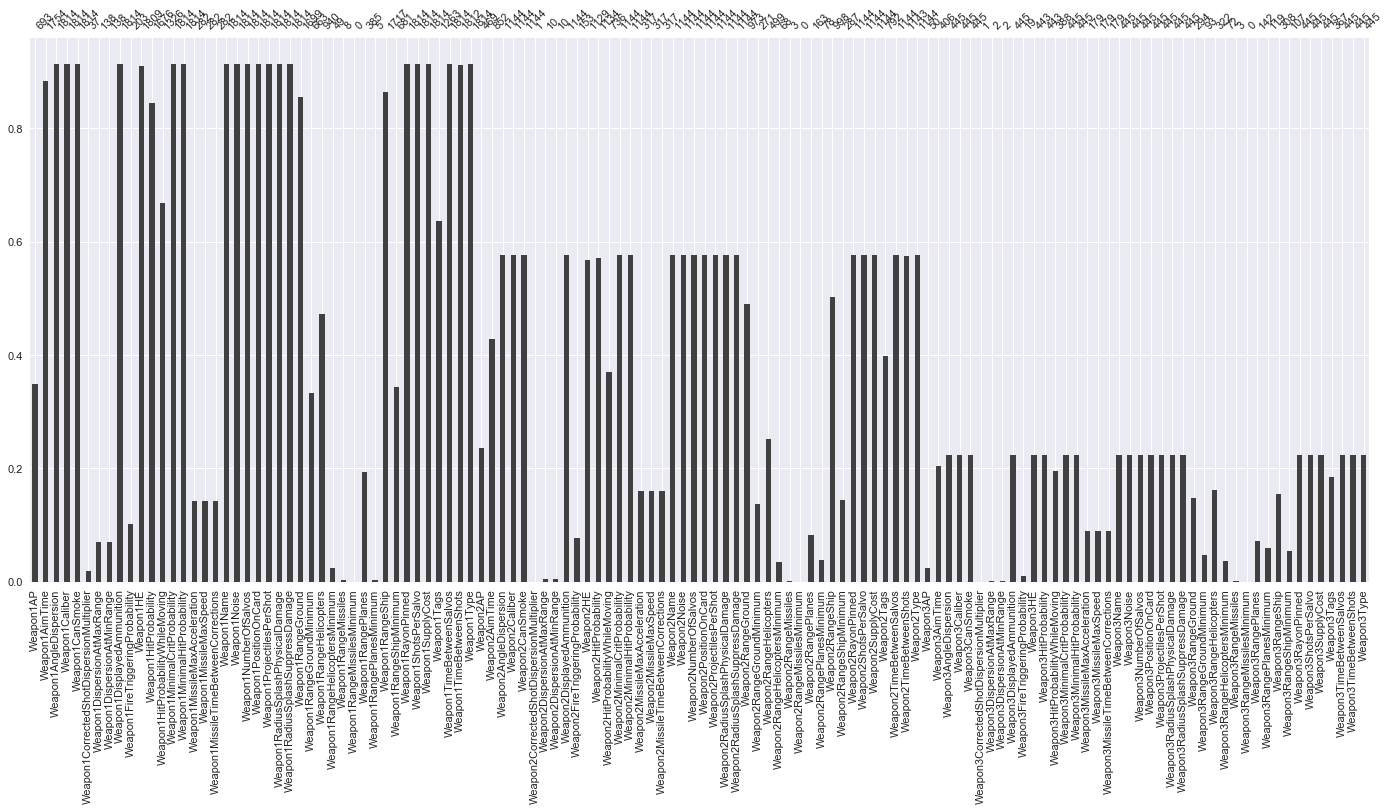

In [22]:
msno.bar(weapons, fontsize=11)

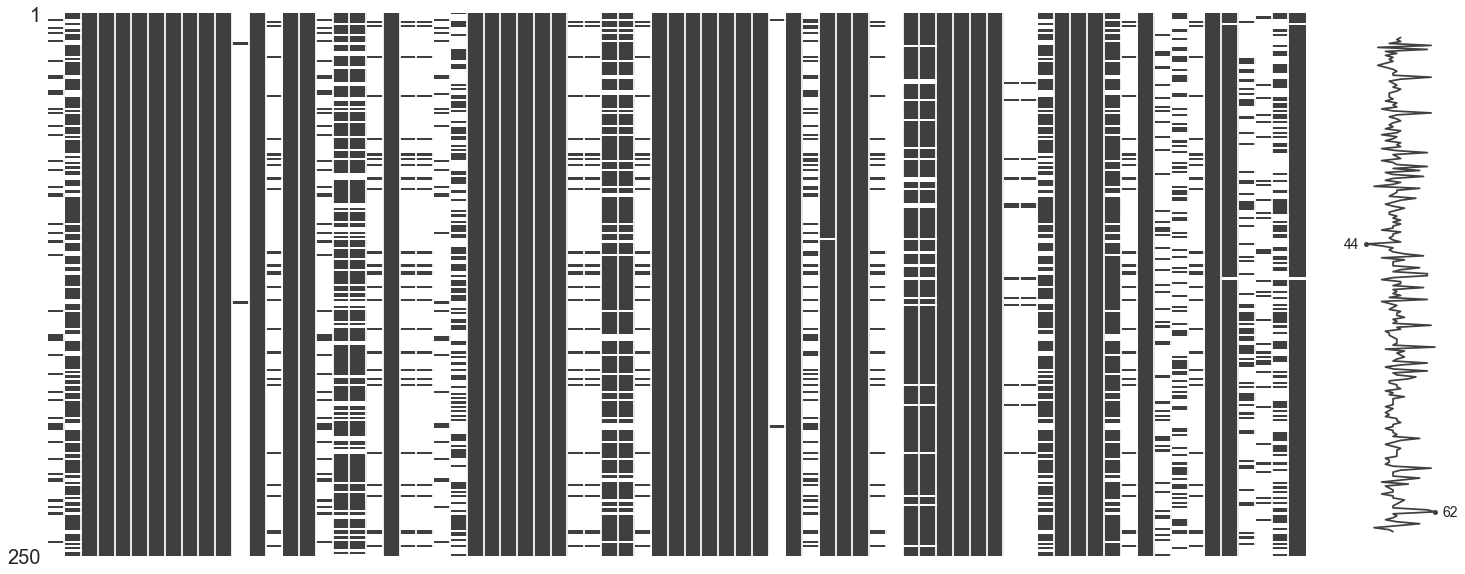

In [20]:
msno.matrix(attributes.sample(250))

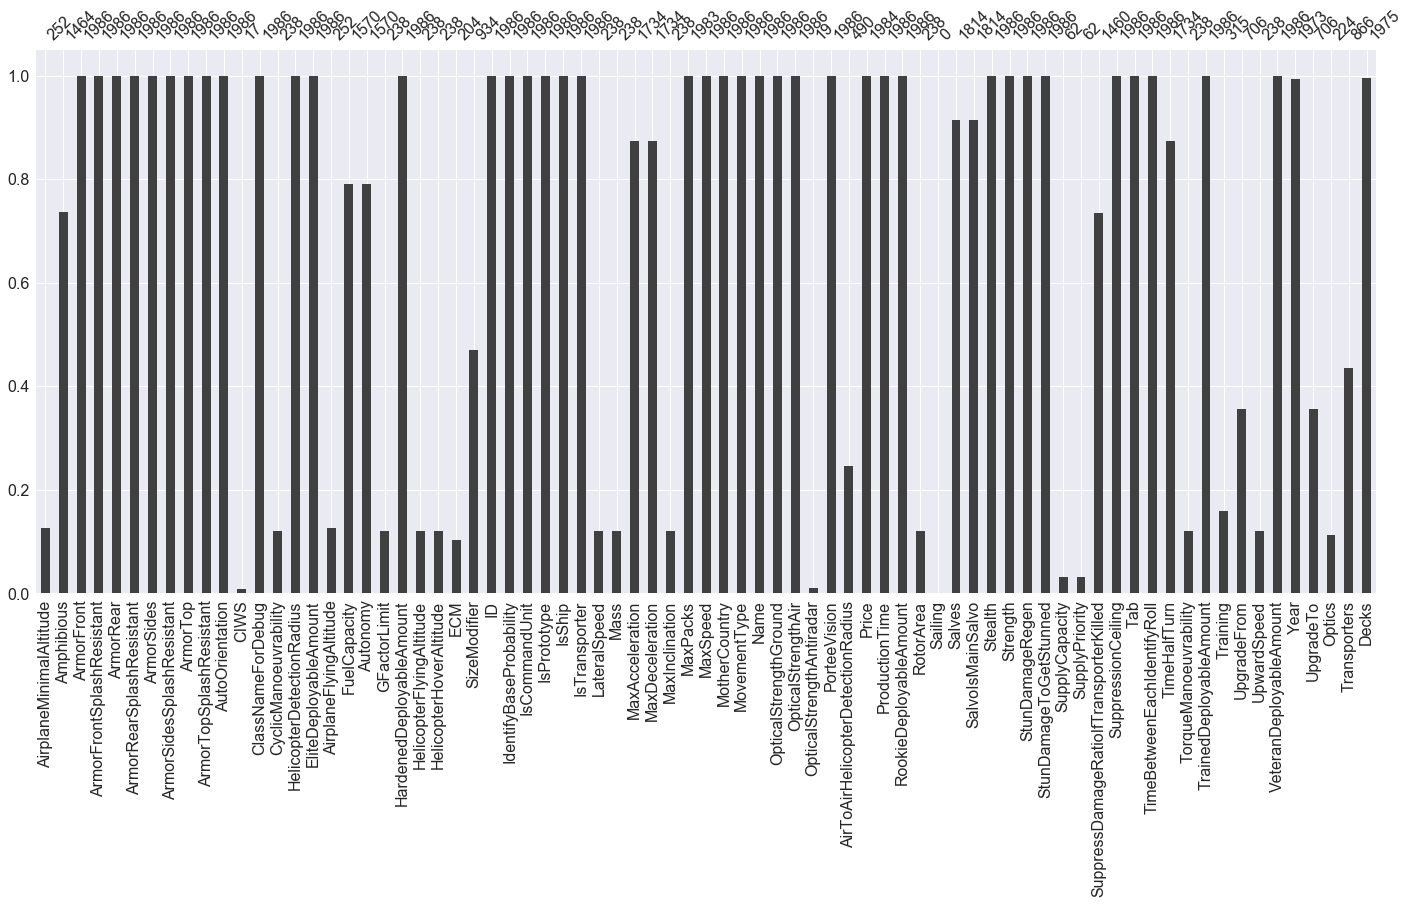

In [18]:
msno.bar(attributes)

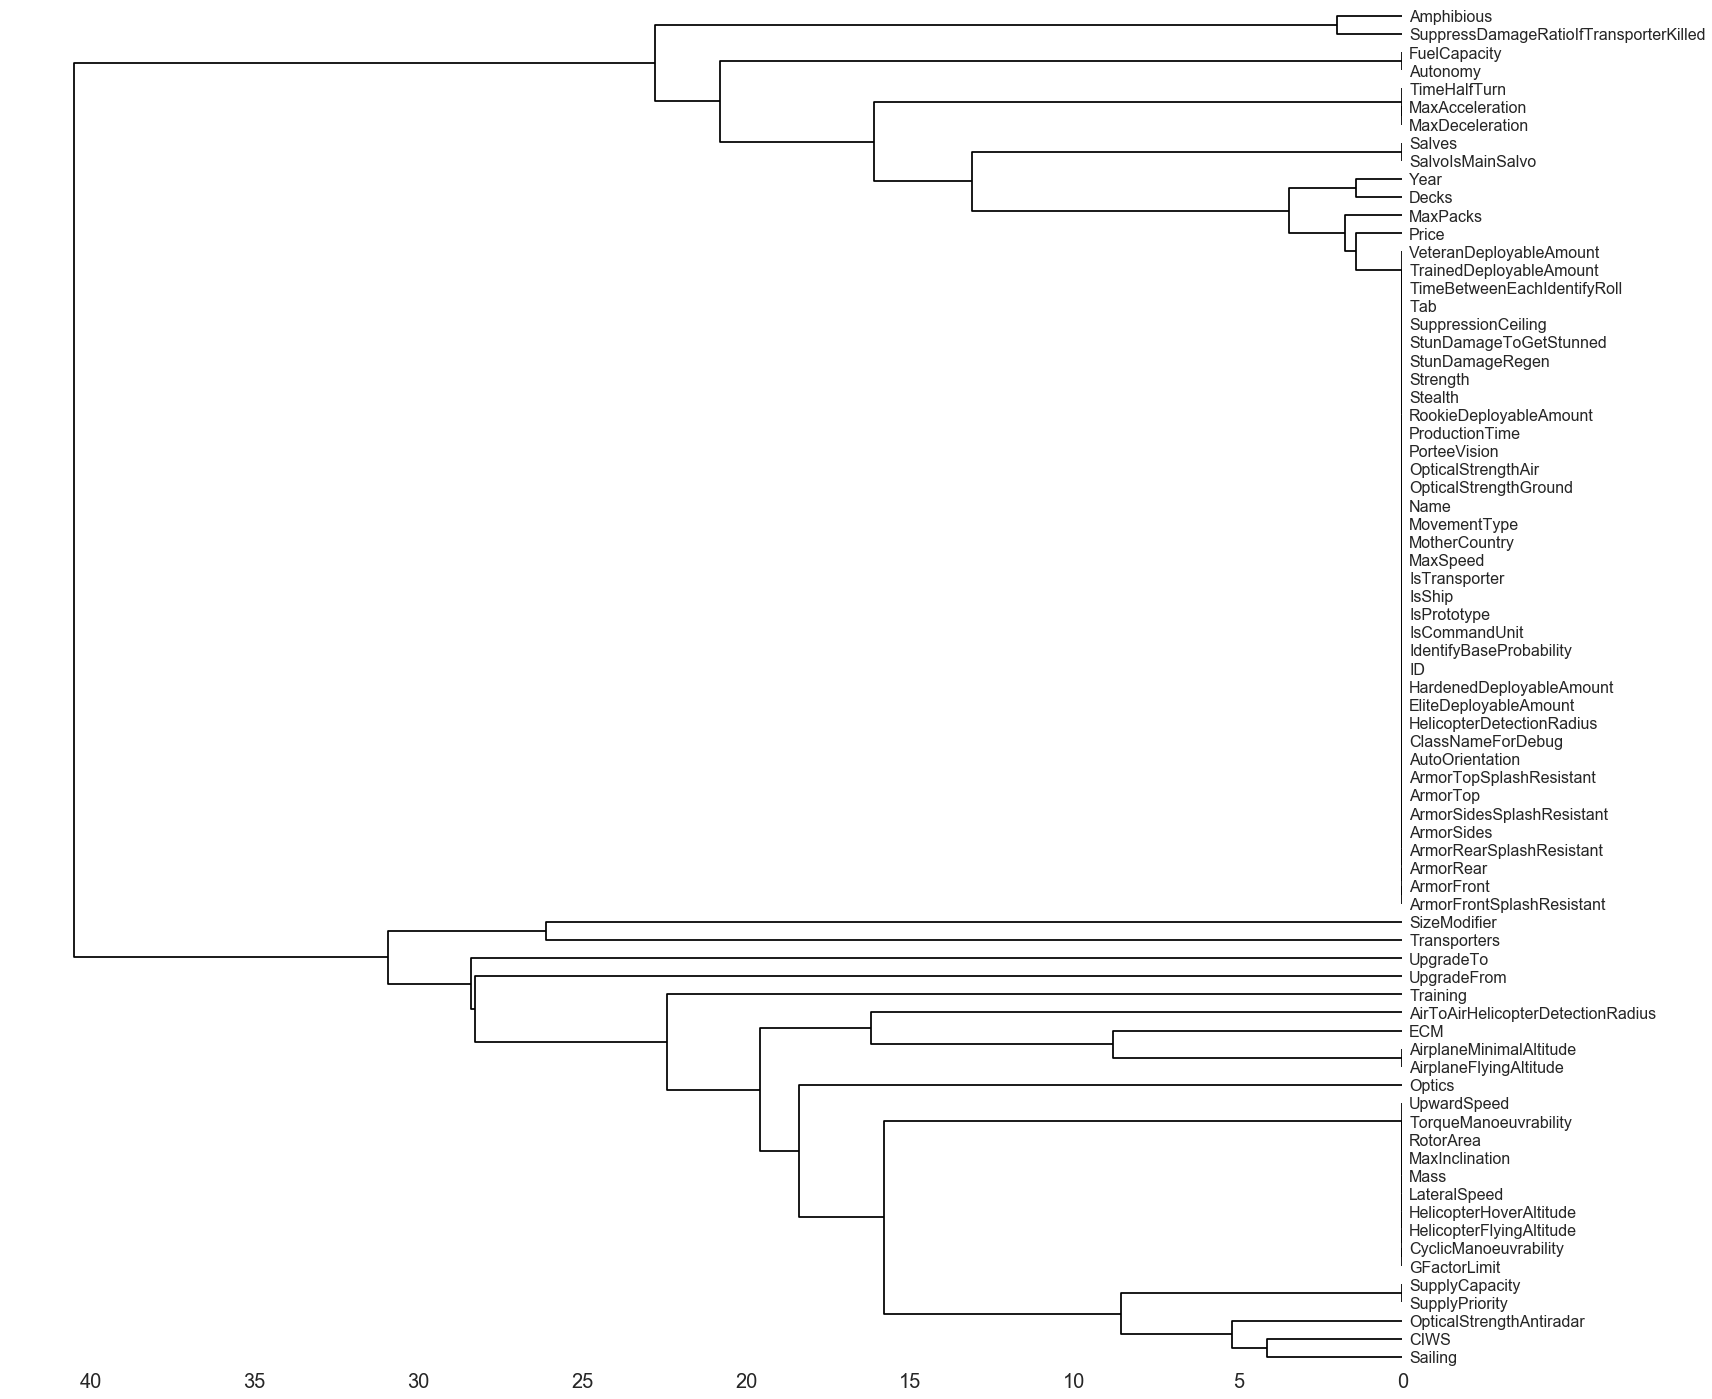

In [23]:
msno.dendrogram(attributes)

In [5]:
wargame.iloc[:, 0].value_counts(dropna=False)

NaN       1734
 250.0      86
 200.0      70
 100.0      52
 150.0      31
 300.0       8
 50.0        5
Name: AirplaneMinimalAltitude, dtype: int64

In [19]:
%matplotlib inline

In [7]:
import holoviews as hv
hv.notebook_extension()

/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Note, when we do `%opts` it changes all settings, `%%opts` changes it only in the current cell. Demo:

b':Bars   [x]   (y)'
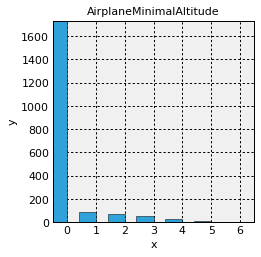

In [25]:
%%opts Bars [show_grid=True]

hv.Bars(wargame.iloc[:, 0].value_counts(dropna=False), 
        label='AirplaneMinimalAltitude')

b':Bars   [x]   (y)'
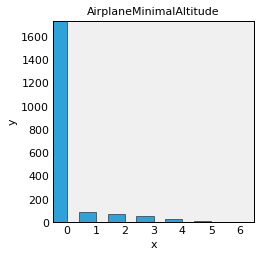

In [26]:
hv.Bars(wargame.iloc[:, 0].value_counts(dropna=False), 
        label='AirplaneMinimalAltitude')

To get help do `hv.help(Element)`.

In [27]:
# hv.help(hv.Bars)

In [174]:
srs = wargame.iloc[:, 0].value_counts().sort_index()

/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/holoviews/plotting/mpl/element.py:152: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  axis.set_axis_bgcolor(self.bgcolor)


b':Bars   [AirplaneMinimalAltitude]   (Count)'
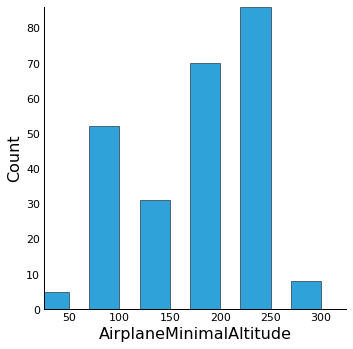

In [176]:
%%opts Bars [fig_size=150 show_frame=False bgcolor='white']

table = hv.Table((srs.index, srs.values), kdims=['AirplaneMinimalAltitude'], vdims=['Count'])

hv.Bars(table)

In [69]:
srs = wargame['ArmorFront'].value_counts().sort_index()

/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/holoviews/plotting/mpl/element.py:152: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  axis.set_axis_bgcolor(self.bgcolor)


b':Bars   [ArmorFront]   (Count)'
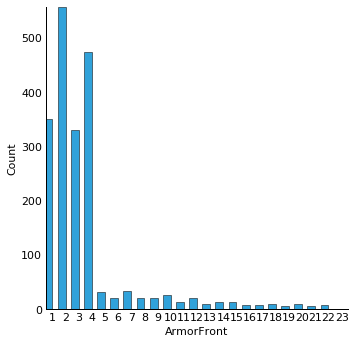

In [70]:
%%opts Bars [fig_size=150 show_frame=False bgcolor='white']

table = hv.Table((srs.index, srs.values), kdims=['ArmorFront'], vdims=['Count'])

hv.Bars(table)

In [56]:
df = (wargame.query('Tab == "TNK"')
         .groupby('ArmorFront')
         ['Price']
         .agg([np.min, np.mean, np.max, np.std, len]))

In [57]:
df

,amin,mean,amax,std,len
ArmorFront,,,,,
2,10.0,19.230769,35.0,7.865048,13.0
3,15.0,26.111111,55.0,15.365907,9.0
4,20.0,30.000000,40.0,14.142136,2.0
5,15.0,27.000000,45.0,8.232726,10.0
6,15.0,31.500000,50.0,9.442810,10.0
7,25.0,32.500000,50.0,8.933515,14.0
8,20.0,41.818182,60.0,11.677484,11.0
9,25.0,35.263158,45.0,6.340716,19.0
10,25.0,50.681818,70.0,12.080627,22.0


In [231]:
table = hv.Table((df.index, df['mean'], df['mean'] - df['amin'], df['amax'] - df['mean']), 
             kdims=['ArmorFront'], 
             vdims=['Cost', 'Min(Cost)', 'Max(Cost)'])

:Overlay
   .Spread.I  :Spread   [ArmorFront]   (Cost,Min(Cost),Max(Cost))
   .Curve.I   :Curve   [ArmorFront]   (Cost,Min(Cost),Max(Cost))
   .Scatter.I :Scatter   [ArmorFront]   (Price)
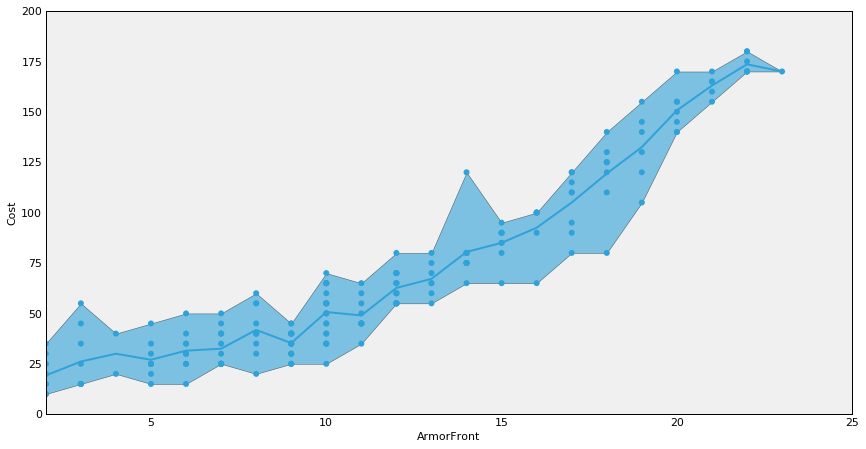

In [155]:
%%opts Overlay [aspect=2 fig_size=400]
(
    hv.Spread(table, extents=(2, 0, 25, 200)) * 
    hv.Curve(table) * 
    hv.Scatter(wargame.query('Tab == "TNK"')[['ArmorFront', 'Price']])
)

/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/holoviews/plotting/mpl/element.py:152: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  axis.set_axis_bgcolor(self.bgcolor)


:Overlay
   .Spread.I  :Spread   [ArmorFront]   (Cost,Min(Cost),Max(Cost))
   .Curve.I   :Curve   [ArmorFront]   (Cost,Min(Cost),Max(Cost))
   .Scatter.I :Scatter   [ArmorFront]   (Price)
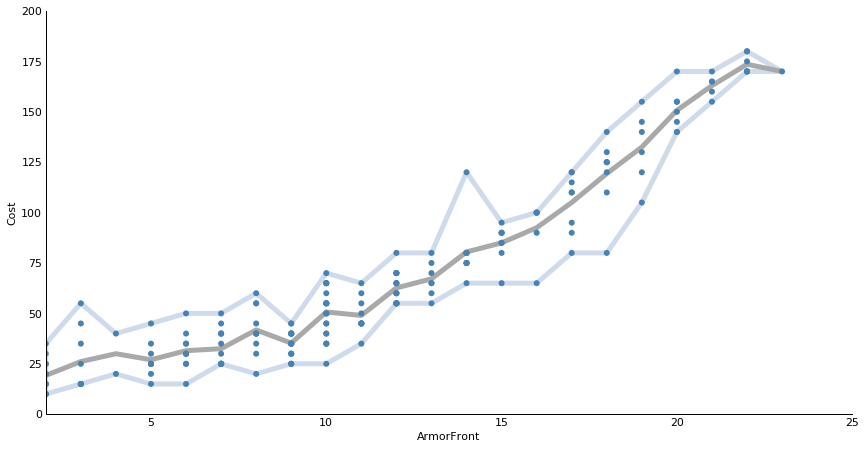

In [224]:
%%opts Overlay [aspect=2 fig_size=400 show_frame=False bgcolor='white']
(
    hv.Spread(table, extents=(2, 0, 25, 200))(style={'facecolor': 'None', 
                                                     'linewidth': 5, 
                                                     'edgecolor': 'lightsteelblue'}) * 
    hv.Curve(table)(style={'color': 'darkgray', 'linewidth': 5}) * 
    hv.Scatter(wargame.query('Tab == "TNK"')[['ArmorFront', 'Price']])(style={'color': 'steelblue'})
)

(Regression doesn't currently work due to a bug), should just be:

    hv.Scatter(wargame.query('Tab == "TNK"')[['ArmorFront', 'Price']])

In [11]:
q = wargame.query('Tab == "TNK"')[['ArmorFront', 'Price']]

/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/holoviews/plotting/mpl/element.py:152: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  axis.set_axis_bgcolor(self.bgcolor)
/home/alex/miniconda3/envs/plotting-tools/lib/python3.6/site-packages/holoviews/plotting/mpl/element.py:152: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  axis.set_axis_bgcolor(self.bgcolor)


b':AdjointLayout\n   :Points   [ArmorFront,Price]\n   :BoxWhisker   (y)\n   :BoxWhisker   (y)'
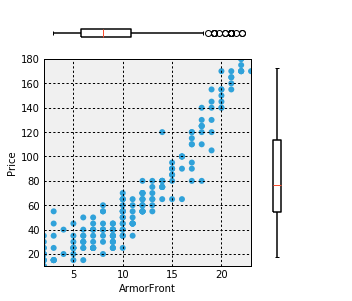

In [13]:
(hv.Points(q) 
    << hv.BoxWhisker(q['ArmorFront']) 
    << hv.BoxWhisker(q['Price']))

In [22]:
q = wargame.query('Tab == "TNK"')[['ArmorFront', 'Price', 'Weapon1AP', 'Year']]

b':Table   [ArmorFront,Price]   (Weapon1AP,Year)'
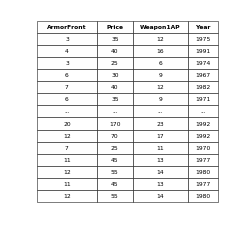

In [23]:
hv.Table(q, kdims=['ArmorFront', 'Price'], vdims=['Weapon1AP', 'Year'])

b':Points   [ArmorFront,Price]   (Weapon1AP,Year)'
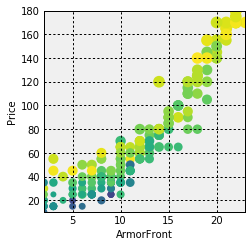

In [24]:
hv.Points(_, vdims=['Weapon1AP', 'Year'])

In [25]:
import seaborn as sns

iris = hv.DFrame(sns.load_dataset("iris"))

b':DFrame   [sepal_length,sepal_width,petal_length,petal_width,species]'
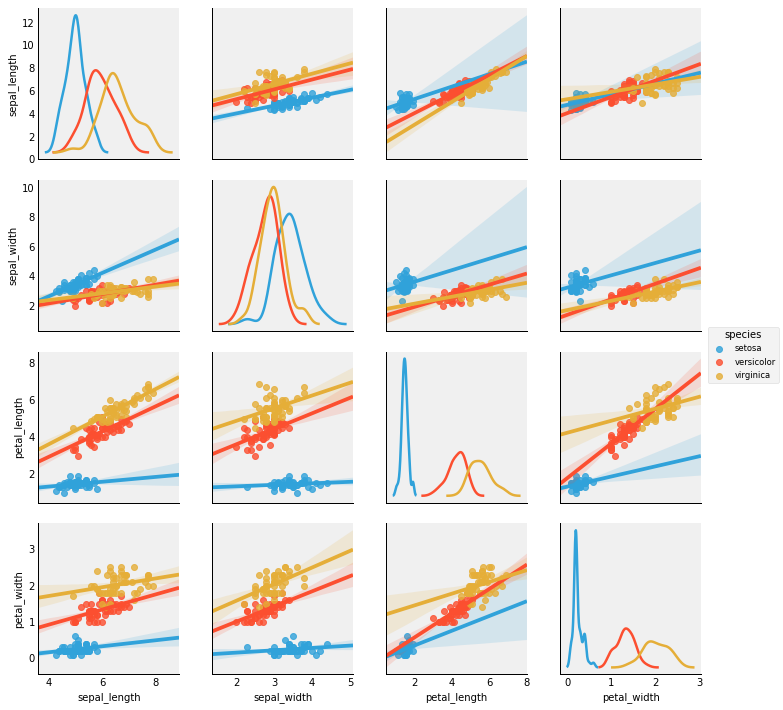

In [26]:
%%opts DFrame (diag_kind='kde' kind='reg' hue='species')
iris.clone(label="Iris Data", plot_type='pairplot')

In [ ]:
min_av_steps = df

In [40]:
2275 // 175

13

In [53]:
r = list(zip(np.linspace(0, 2275, num=2275 // 175 + 1), list(range(13, -1, -1))))

In [54]:
r

[(0.0, 13),
 (175.0, 12),
 (350.0, 11),
 (525.0, 10),
 (700.0, 9),
 (875.0, 8),
 (1050.0, 7),
 (1225.0, 6),
 (1400.0, 5),
 (1575.0, 4),
 (1750.0, 3),
 (1925.0, 2),
 (2100.0, 1),
 (2275.0, 0)]

In [ ]:
r 

In [ ]:
def av_price(ap_value):
    np.linspace(0, 2275, num=2275 // 175 + 1).map(lambda v:)
    175

In [ ]:
srfc = [(
            (frame), 
            hv.RGB(surface_data[...,frame], label='_LABEL_', group='_GROUP_')
        )
        for frame in range(len(dates))]

surface_wind = hv.HoloMap(srfc, kdims=['_INDEXER_'])